### 솔루션 링크

In [ ]:
#  https://github.com/Sancho-kim/LinAlg4DS

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### [연습문제 5-3]


In [5]:
# Create a matrix
M = 50
A = np.random.randn(M,M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero
norm1-norm2

0.0

### [연습문제 5-4]

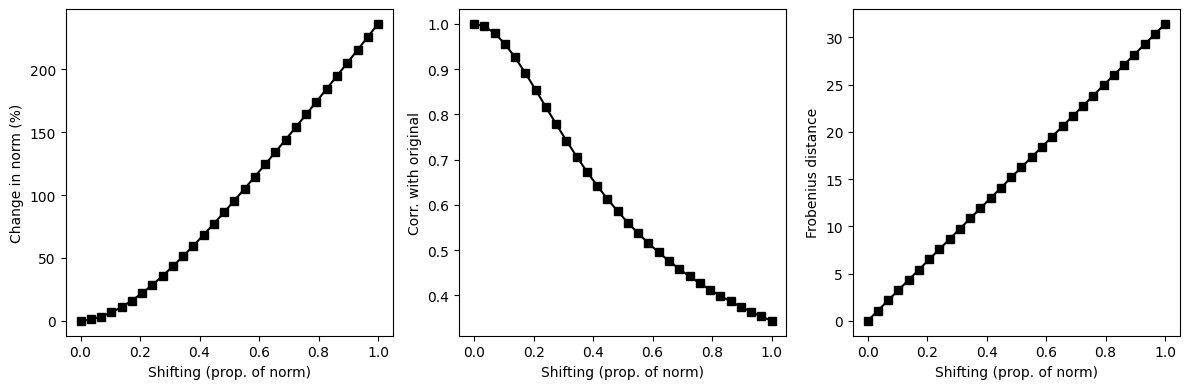

In [16]:
# Function to compute Euclidean distance

def EuclideanDistance(M1,M2):

  # matrix difference
  D = M1-M2

  # matrix distance
  return np.sqrt(np.sum(D**2))

# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

  # shift the matrix
  As = A + shifting[si]*normA*np.eye(N)

  # get the new norm and transform to %-change
  normShift = np.linalg.norm(As,'fro')
  shiftingResults[si,0] = 100 * (normShift-normA)/normA

  # compute correlation
  shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

  # Frobenius distance
  shiftingResults[si,2] = EuclideanDistance(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_05_06.png',dpi=300)
plt.show()

### [연습문제 5-5]

In [8]:
# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))


(5, 8)
3


### [연습문제 5-6]

In [12]:
# summed matrix has rank-0
A = np.diag([ 1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

# print out their ranks
print(np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C))


# summed matrix has rank-1
A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A+B

# print out their ranks
print(np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C))

# summed matrix has rank-2
A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

# print out their ranks
print(np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C))

# random matrices have maximum possible rank!
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

# print out their ranks
print(np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C))

1 1 0
1 1 1
1 1 2
1 1 2


### [연습문제 5-7]

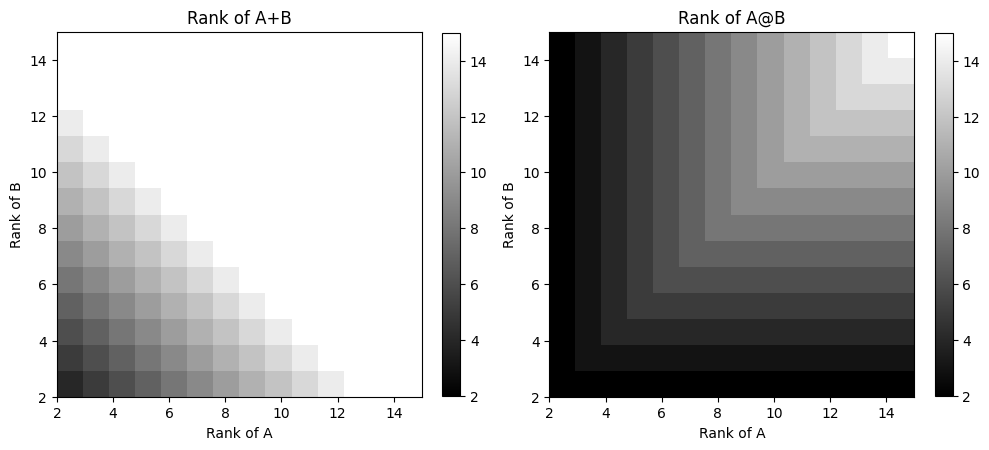

In [13]:

# The function
def makeAmatrix(M,r):
  return np.random.randn(M,r) @ np.random.randn(r,M)


# parameters
matSize = 20 # matrix size (square)
rs = range(2,16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs),len(rs),2))

# run the simulation
for i in range(len(rs)):
  for j in range(len(rs)):

    # create the matrices
    S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
    M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])

    # compute their ranks
    Ranks[i,j,0] = np.linalg.matrix_rank(S)
    Ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')

  # add colorbar and other niceties
  fig.colorbar(h,ax=axs[i],fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_05_09.png',dpi=300)
plt.tight_layout()
plt.show()

### [연습문제 5-8]

In [14]:
# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


### [연습문제 5-9]

In [15]:
# function to run algorithm
def is_V_inColA(A,v):

  # check sizes
  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

  # compute ranks
  rankA  = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

  # function outputs TRUE if v \in C(A)
  return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

False